# Travelling Salesman Problem using Genetic Algorithm

In [1]:
# Imports
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
# Options
n_cities = 10 # Number of cities

n_population = 100

mutation_rate = 0.1

n_generation = 100

In [3]:
# Generating a list of coordinates representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,200,n_cities),np.random.randint(0,200,n_cities))]
names_list = np.array([x for x in range(n_cities)])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

cities_dict

{0: [119, 61],
 1: [169, 96],
 2: [135, 179],
 3: [198, 124],
 4: [130, 64],
 5: [0, 6],
 6: [197, 83],
 7: [199, 89],
 8: [60, 152],
 9: [108, 80]}

In [4]:
# Function to calculate the distance between two cities
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

Text(0.5, 1.0, 'Traveling Salesman Problem')

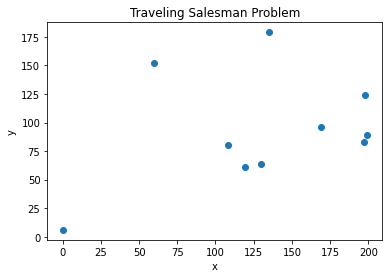

In [5]:
# Visualize Cities
gen_cities = []
for i in cities_dict.keys():
    gen_cities.append(cities_dict[i])

plt.scatter([c[0] for c in gen_cities], [c[1] for c in gen_cities])

plt.xlabel("x")
plt.ylabel("y")

plt.title("Traveling Salesman Problem")

## 1. Initialization

In [6]:
# Create the first population set : random order of city indices
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)

## 2. Fitness function

In [7]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(len(city_list)-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [8]:
def get_all_fitness(population_set, cities_dict):
    fitness_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(len(population_set)):
        fitness_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitness_list

fitness_list = get_all_fitness(population_set,cities_dict)

# 3. Selection

In [9]:
# tournament selection
def selection(population_set,fitness_list):
    # first random selection
    selection_ix = random.randint(0,len(population_set)-1)
    ix = random.randint(0, len(population_set)-1)
    # perform a tournament
    if fitness_list[ix] < fitness_list[selection_ix]:
        selection_ix = ix
    return population_set[selection_ix]

# select parents
def progenitor_selection(population_set,fitness_list):
    if len(population_set) % 2 == 0 :
        progenitor_list = [selection(population_set,fitness_list).tolist() for _ in range(int(len(population_set)/2))]
    else:
        progenitor_list = [selection(population_set,fitness_list).tolist() for _ in range(int(len(population_set)/2) + 1)]
    return np.array(progenitor_list)

progenitor_list = progenitor_selection(population_set,fitness_list)

# 4. Mating

In [10]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:3]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring
    
def mate_population(progenitor_list, n_population):
    new_population_set = []

    progenitor_list_a_index = np.random.choice(list(range(int(n_population/2))), int(n_population/2), replace = False)
    progenitor_list_b_index = np.random.choice(list(range(int(n_population/2))), int(n_population/2), replace = False)
    
    progenitor_list_a = []
    progenitor_list_b = []
    
    for i in progenitor_list_a_index:
        progenitor_list_a.append(progenitor_list[i].tolist())
    
    for i in progenitor_list_b_index:
        progenitor_list_b.append(progenitor_list[i].tolist())
    
    for i in range(int(n_population/2)):
        prog_a = progenitor_list_a[i]
        prog_b = progenitor_list_b[i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring.tolist())
        
    return new_population_set

new_population_set = mate_population(progenitor_list, n_population)

# 5. Mutation

In [11]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)

new_population = np.array(progenitor_list.tolist() + mutated_pop)

# 6. Run Genetic Algorithm

In [12]:
def Run_GA(cities_dict, names_list, n_population, n_generation):
    
    # Create the first population set
    population_set = genesis(names_list, n_population)
    
    fitness_list = get_all_fitness(population_set,cities_dict)
    
    best_solution = [-1,np.inf,np.array([])]
    
    new_population = population_set
    
    for i in range(n_generation):
        
        # Selection
        progenitor_list = progenitor_selection(new_population,fitness_list)

        # Mating
        new_population_set = mate_population(progenitor_list,n_population)
        
        # Mutation
        mutated_pop = mutate_population(new_population_set)
        
        # New population
        new_population = np.array(progenitor_list.tolist() + mutated_pop)
        
        if i%(n_generation/10)==0: print(i, fitness_list.min(), fitness_list.mean())
        
        # Fitness
        fitness_list = get_all_fitness(new_population,cities_dict)
        
        #Saving the best solution
        if fitness_list.min() < best_solution[1]:
            best_solution[0] = i
            best_solution[1] = fitness_list.min()
            best_solution[2] = np.array(new_population)[fitness_list.min() == fitness_list]

    return best_solution
    
best_solution = Run_GA(cities_dict, names_list, n_population, n_generation)

0 692.8346116613568 908.2598275461762
10 533.5470286978816 710.3434044193787
20 547.5205640564174 680.6346008479438
30 518.8259345360168 640.600539945168
40 491.78496684347414 635.2670844317696
50 491.78496684347414 606.032220304674
60 491.78496684347414 603.9070230571652
70 491.78496684347414 614.2959088998667
80 491.78496684347414 602.9536787588418
90 491.78496684347414 618.4054833907347


In [13]:
best_solution

[12, 484.0251787731966, array([[5, 8, 9, 0, 4, 1, 6, 7, 3, 2]])]

Text(0.5, 1.0, 'Optimized Route')

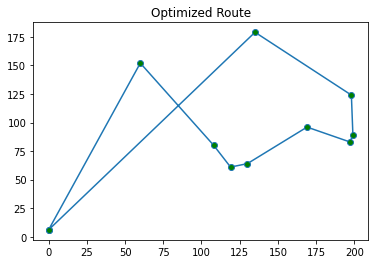

In [14]:
# Visualize Result
cities_ordered = best_solution[2][0]

cities_ordered_coord = []
for i in cities_ordered:
    cities_ordered_coord.append(cities_dict[i])

X = [c[0] for c in cities_ordered_coord] + [cities_ordered_coord[0][0]]
Y = [c[1] for c in cities_ordered_coord] + [cities_ordered_coord[0][1]]

plt.plot(X,Y, marker = "o", markerfacecolor='green')
plt.title("Optimized Route")